In [3]:
import os
import pandas as pd
import pandas as pd
import seaborn as sns
# Define the directory where your CSV files are stored
csv_dir = "../local/bbcpy_AutoML/logs/10_11/results/"
# "C:\Users\alioo\Desktop\MA\bbcpy_AutoML\local\bbcpy_AutoML\logs\10_11\results"

In [4]:
import os
import glob

# Path to the directory containing the files
file_path = "../local/bbcpy_AutoML/logs/10_11/results/"

# Pattern to match all csv files
pattern = os.path.join(file_path, "*.csv")

# List to hold dataframes
dataframes = []

# Iterate over files that match the csv pattern
for file in glob.glob(pattern):
    # Extract task name, model name, and subject name from the file name
    filename = os.path.basename(file)

    if len(filename.split("_")) == 3:
        task_name, model_name, subject_name = filename.split("_")
    else:
        task_name, _, model_name, subject_name = filename.split("_")
    
    subject_name = subject_name.split('.')[0]  # Remove the file extension
    
    # Load the CSV file
    df = pd.read_csv(file)
    
    # Filter columns that contain "mean"
    mean_columns = [col for col in df.columns if 'mean' in col]
    df = df[mean_columns]
    
    # Add task, model, and subject as columns to the dataframe
    df['Task'] = task_name
    df['Model'] = model_name
    df['Subject'] = subject_name
    
    # Append to the list of dataframes
    dataframes.append(df)

# Combine all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the combined dataframe
combined_data


,mean_test/acc,mean_test/f1,mean_val/acc,mean_val/f1,Task,Model,Subject
0,0.323188,0.309661,0.362419,0.327744,2D,csp-MNE,S1
1,0.429197,0.410579,0.448556,0.433679,2D,csp-MNE,S2
2,0.458065,0.440802,0.507006,0.500014,2D,csp-MNE,S20
3,0.348000,0.334608,0.391695,0.379413,2D,csp-MNE,S23
4,0.351938,0.268208,0.366807,0.308752,2D,csp-MNE,S26
...,...,...,...,...,...,...,...
113,0.887582,0.887034,0.906493,0.905979,LR,tangent,S52
114,0.924183,0.923601,0.931595,0.931369,LR,tangent,S57
115,0.838554,0.838212,0.957585,0.957522,LR,tangent,S60
116,0.882906,0.882912,0.920820,0.920685,LR,tangent,S8


In [5]:
# Separate the data by task
df_2d = combined_data[combined_data['Task'] == '2D']
df_lr = combined_data[combined_data['Task'] == 'LR']

In [6]:
df_2d

,mean_test/acc,mean_test/f1,mean_val/acc,mean_val/f1,Task,Model,Subject
0,0.323188,0.309661,0.362419,0.327744,2D,csp-MNE,S1
1,0.429197,0.410579,0.448556,0.433679,2D,csp-MNE,S2
2,0.458065,0.440802,0.507006,0.500014,2D,csp-MNE,S20
3,0.348000,0.334608,0.391695,0.379413,2D,csp-MNE,S23
4,0.351938,0.268208,0.366807,0.308752,2D,csp-MNE,S26
5,0.426846,0.381702,0.380556,0.340268,2D,csp-MNE,S28
6,0.344516,0.272903,0.316565,0.249858,2D,csp-MNE,S29
7,0.458228,0.460739,0.487228,0.478683,2D,csp-MNE,S30
8,0.382822,0.334908,0.462596,0.432287,2D,csp-MNE,S36
9,0.408696,0.378475,0.381558,0.347699,2D,csp-MNE,S38


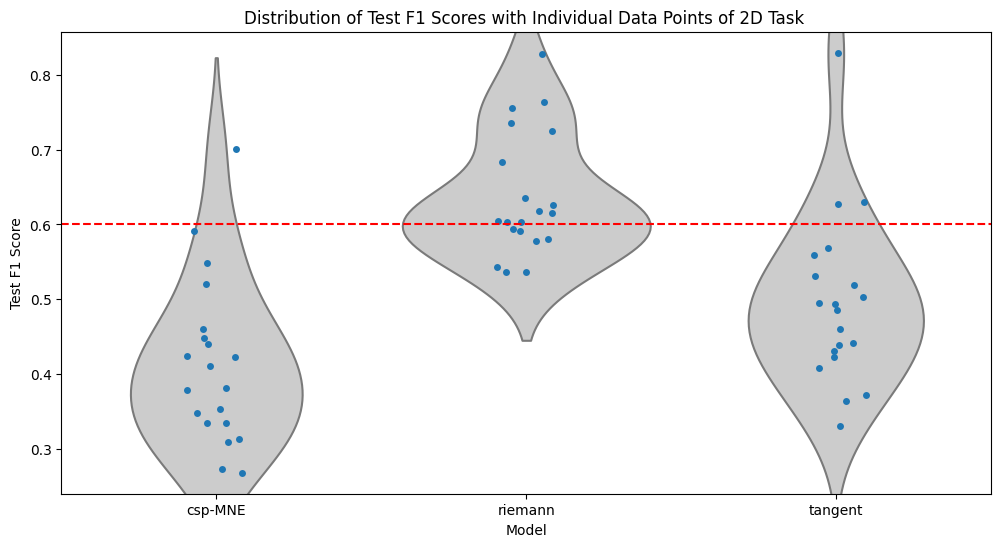

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold_value = 0.6

# Assuming 'df' is your DataFrame and 'mean_test/f1' is the metric of interest
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y='mean_test/f1', data=df_2d, inner=None, color=".8")

# Overlay the individual data points
sns.stripplot(x='Model', y='mean_test/f1', data=df_2d, jitter=True, zorder=1)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test F1 Scores with Individual Data Points of 2D Task ')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.show()


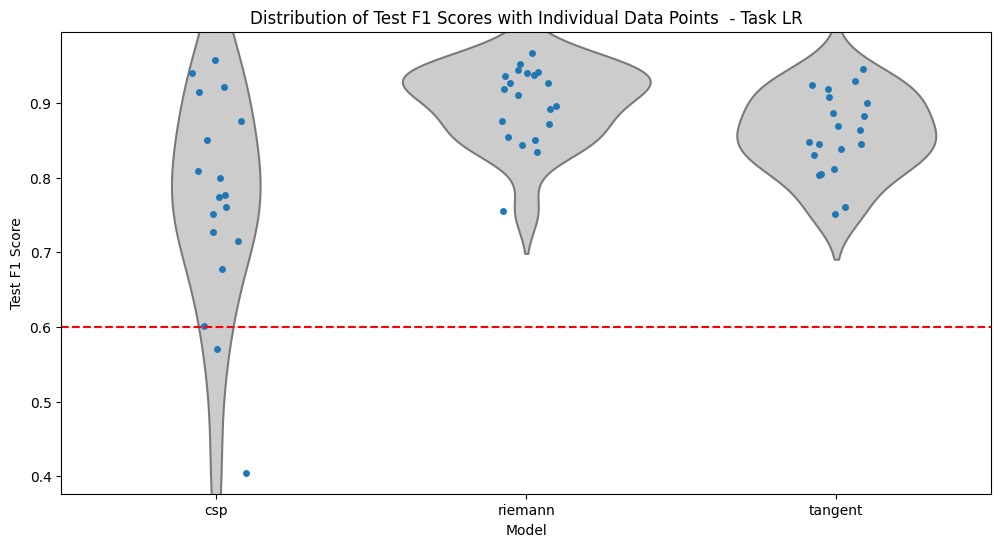

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

threshold_value = 0.6

# Assuming 'df' is your DataFrame and 'mean_test/f1' is the metric of interest
plt.figure(figsize=(12, 6))

# Create the violin plot
sns.violinplot(x='Model', y='mean_test/f1', data=df_lr, inner=None, color=".8")

# Overlay the individual data points
sns.stripplot(x='Model', y='mean_test/f1', data=df_lr, jitter=True, zorder=1)

# Draw a threshold line
plt.axhline(y=threshold_value, color='r', linestyle='--')

plt.title('Distribution of Test F1 Scores with Individual Data Points  - Task LR')
plt.xlabel('Model')
plt.ylabel('Test F1 Score')
plt.show()
